In [22]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD
import re

In [3]:
books = pd.read_excel('User 4.xlsx',sheet_name = 'user_item4',encoding="latin-1")
books.head()

,Unnamed: 0,USER,ITEM,RATING
0,1,A2NVNMLC0AFL08,B004KNWWMW,5
1,2,A1F1FOR46702YF,B001KVZ6HK,5
2,3,A3M6TSEV71537G,439023483,4
3,4,A2XJCPCMH83X1K,B00FZM8Z7I,4
4,5,A1F6TTVJS0PM2P,B004KNWWNQ,5


In [16]:
books.dtypes

Unnamed: 0     int64
USER          object
ITEM          object
RATING         int64
dtype: object

In [7]:
items = pd.read_excel('User 4.xlsx',sheet_name = 'Item-desc',encoding="latin-1")
items.head()

,ITEM,title
0,B004KNWWMW,Fostex T40RP MkII Pro Headphones\t\t\t\t\t\t\t...
1,B001KVZ6HK,Avengers
2,439023483,Rectangular Dark Orange Enamel Silver Cufflink...
3,439023483,Rectangular Dark Orange Enamel Silver Cufflink...
4,B00FZM8Z7I,FROZEN


In [15]:
items.dtypes

ITEM     object
title    object
dtype: object

In [17]:
Ratings = pd.DataFrame(books.groupby('ITEM')['RATING'].mean())

In [18]:
Ratings.head()

,RATING
ITEM,
7386648,3.639175
7442920,3.510638
7444117,3.000000
141039280,3.785185
307943232,3.600000


In [19]:
Ratings['number_of_ratings'] = books.groupby('ITEM')['RATING'].count()
Ratings.head()

,RATING,number_of_ratings
ITEM,,
7386648,3.639175,97
7442920,3.510638,94
7444117,3.000000,89
141039280,3.785185,135
307943232,3.600000,40


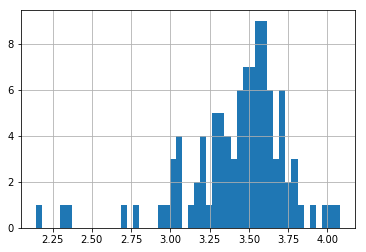

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
Ratings['RATING'].hist(bins=50)

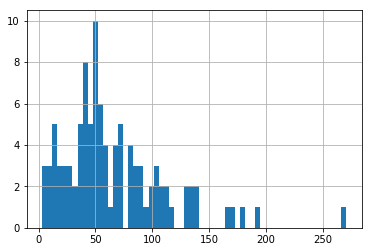

In [21]:
Ratings['number_of_ratings'].hist(bins=60)

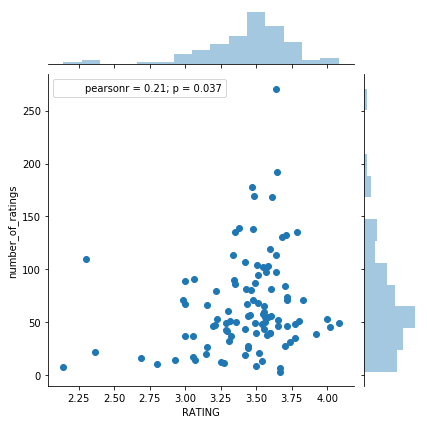

In [22]:
import seaborn as sns
sns.jointplot(x='RATING', y='number_of_ratings', data=Ratings)

**Checking for Null Values** 

In [17]:
books.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
books.columns

Index(['USER', 'ITEM', 'RATING'], dtype='object')

In [19]:
def clean_state(statement):
    return ' '.join(re.sub("/@%&|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", statement).split())

In [23]:
for i in items['title'].index:
    items['title'][i] = clean_state(items['title'][i])

In [25]:
items.head()

,ITEM,title
0,B004KNWWMW,Fostex T40RP MkII Pro Headphones
1,B001KVZ6HK,Avengers
2,439023483,Rectangular Dark Orange Enamel Silver Cufflink...
3,439023483,Rectangular Dark Orange Enamel Silver Cufflink...
4,B00FZM8Z7I,FROZEN


In [26]:
items.drop_duplicates(inplace=True)

In [28]:
Products = pd.merge(books,items,on='ITEM')

In [29]:
Products.head()

,USER,ITEM,RATING,title
0,A2NVNMLC0AFL08,B004KNWWMW,5,Fostex T40RP MkII Pro Headphones
1,A2UZUH4QHV4HA1,B004KNWWMW,5,Fostex T40RP MkII Pro Headphones
2,A2IX2PCXS5O2FK,B004KNWWMW,5,Fostex T40RP MkII Pro Headphones
3,AWG2Y42W9RNNK,B004KNWWMW,4,Fostex T40RP MkII Pro Headphones
4,A1YGUFU306JKGK,B004KNWWMW,5,Fostex T40RP MkII Pro Headphones


In [31]:
Products.describe()

,RATING
count,6874.000000
mean,3.480361
std,1.333834
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [33]:
Products.shape

(6874, 4)

In [9]:
Books_matrix = books.pivot_table(index='USER', columns='ITEM', values='RATING')
Books_matrix.head()

ITEM,7386648,7442920,7444117,141039280,307943232,316044695,316055433,345803485,345803493,345803507,...,B00DAHSVYC,B00DJFIMW6,B00DR0PDNE,B00E8KLWB4,B00FAPF5U0,B00FZM8Z7I,B00G5LQ5MU,B00I3MMN4I,B00I3MPDP4,B00I8Q77Y0
USER,,,,,,,,,,,,,,,,,,,,,
A0718784TOWF9DX1DOFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100L918633LUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A102Z3T7NSM5KC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105A034ZG9EHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105CCKIWRGI3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
